In [1]:
!pip install --quiet git+https://github.com/atagade/lucent

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
import torch
import urllib.request 
import numpy as np
import collections
from functools import partial
from PIL import Image
from lucent.modelzoo import custom_resnet
from lucent.optvis import objectives, transform, param, render
from lucent.optvis.render import hook_model

In [3]:
import csv

output = []

with open('results/resnet50_23_06_04_10_02/descriptions.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(reader):
        if i == 0:
            continue
        output.append(row)
        
        

In [4]:
import numpy as np

similarities = torch.tensor(np.asarray(output)[:,3].astype(float))

In [24]:
(similarities == similarities.max()).nonzero()

(array([2576]),)

In [26]:
output[2576]

['layer4', '720', 'kitchens', '0.85198975']

In [23]:
import torch
import torchvision

device = 'cuda' if torch.cuda.is_available else 'cpu'

model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.IMAGENET1K_V1).to(device).eval()

100%|██████████| 512/512 [00:08<00:00, 62.06it/s]



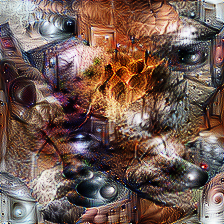

In [46]:
from lucent.optvis import objectives, transform, param, render
from lucent.optvis.render import hook_model

param_f = lambda: param.image(224)

obj = objectives.channel(output[2576][0], int(output[2576][1]))

_ = render.render_vis(model, obj, param_f, preprocess = True, show_inline = True, thresholds=(512,))

In [56]:
concept_indices = similarities.topk(similarities[similarities > 0.6].shape[0]).indices

In [39]:
layer3_outputs = np.asarray(output)[np.asarray(output)[:,0].astype(str) == 'layer3']

In [40]:
layer3_similarities = torch.tensor(layer3_outputs[:,3].astype(float))

In [41]:
layer3_similarities

tensor([0.1723, 0.2979, 0.1953,  ..., 0.2066, 0.1637, 0.1675],
       dtype=torch.float64)

In [42]:
concept_indices = layer3_similarities.topk(5).indices

kitchens : 0.65475464 layer3 - 277


100%|██████████| 512/512 [00:08<00:00, 62.83it/s]



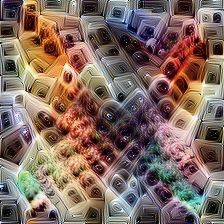

corridor : 0.61328125 layer3 - 945


100%|██████████| 512/512 [00:08<00:00, 61.71it/s]



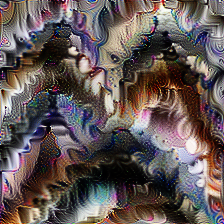

leaf : 0.5717163 layer3 - 772


100%|██████████| 512/512 [00:08<00:00, 61.17it/s]



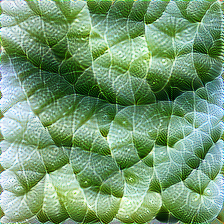

spiral : 0.5345764 layer3 - 59


100%|██████████| 512/512 [00:08<00:00, 61.04it/s]



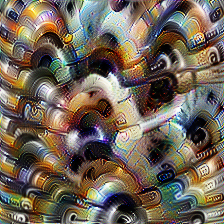

dotted : 0.52957153 layer3 - 148


100%|██████████| 512/512 [00:08<00:00, 59.76it/s]



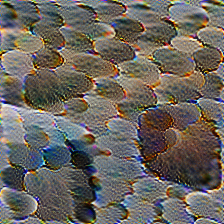

In [44]:
for index in concept_indices:
    print(f"{layer3_outputs[index][2]} : {layer3_outputs[index][3]} {layer3_outputs[index][0]} - {layer3_outputs[index][1]}")

    param_f = lambda: param.image(224)

    obj = objectives.channel(layer3_outputs[index][0], int(layer3_outputs[index][1]))

    _ = render.render_vis(model, obj, param_f, preprocess = True, show_inline = True, thresholds=(512,))    